# ES-RNN model 



In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict, deque
from IPython.display import Image
import time
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error #mean_absolute_percentage_error
%matplotlib inline

from common.utils import load_data, mape, TimeSeriesTensor, create_evaluation_df

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [2]:
#data crime all loc/nozero','energyall.csv

Load data into Pandas dataframe

In [3]:
filee='allgood'
path='./data1/'

In [4]:
energy1 = load_data('D:/dataset type of crime new/new no wrong/',filee+'.csv')
energy1.head()

,Unnamed: 0,load,crime1,crime2,crime3,crime4,crime5
2006-01-01 00:00:00,0,161,19,26,15,45,56
2006-01-01 01:00:00,1,72,21,9,16,15,11
2006-01-01 02:00:00,2,54,13,6,15,10,10
2006-01-01 03:00:00,3,47,9,7,18,9,4
2006-01-01 04:00:00,4,52,7,10,20,12,3


In [5]:
year0=2010
year=str(year0)
year3=str(year0+3)
year2=str(year0+4)
valid_start_dt = year3+'-08-29 23:11:00'
test_start_dt = year2+'-01-01 11:00:00'
test_end_dt = year2+'-12-30 18:00:00'
T = 18
HORIZON = 1

In [6]:
energy1 = energy1.copy()[energy1.index >= year+'-01-1 00:00:00'][['load', 'crime1','crime2','crime3','crime4','crime5']]
energy1=energy1.copy()[energy1.index <= test_end_dt][['load', 'crime1','crime2','crime3','crime4','crime5']]

In [7]:
energy1=energy1.copy()[energy1.index <= test_end_dt][['load', 'crime1','crime2','crime3','crime4','crime5']]

In [8]:
energy=energy1.copy()
energy0=energy1.copy()

In [9]:
energy0.head(10)

,load,crime1,crime2,crime3,crime4,crime5
2010-01-01 00:00:00,256,12,14,16,180,34
2010-01-01 01:00:00,81,13,8,20,26,14
2010-01-01 02:00:00,59,7,12,28,5,7
2010-01-01 03:00:00,63,9,6,29,14,5
2010-01-01 04:00:00,67,5,13,28,18,3
2010-01-01 05:00:00,36,1,5,22,7,1
2010-01-01 06:00:00,26,2,2,16,6,0
2010-01-01 07:00:00,30,4,5,12,9,0
2010-01-01 08:00:00,49,8,6,11,17,7
2010-01-01 09:00:00,41,8,10,8,6,9


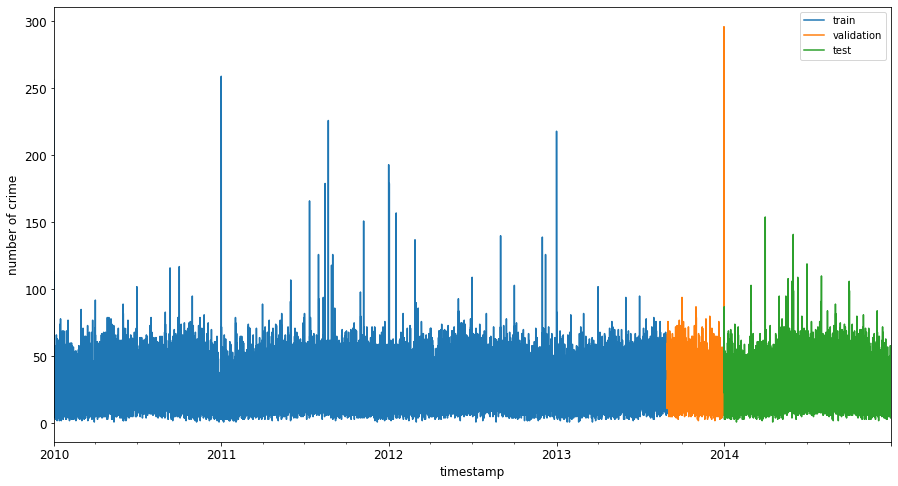

In [10]:
energy[energy.index < valid_start_dt][['load']].rename(columns={'load':'train'}) \
    .join(energy[(energy.index >=valid_start_dt) & (energy.index < test_start_dt)][['load']] \
          .rename(columns={'load':'validation'}), how='outer') \
    .join(energy[test_start_dt:test_end_dt][['load']].rename(columns={'load':'test'}), how='outer') \
    .plot(y=['train', 'validation', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('number of crime', fontsize=12)
plt.show()

In [11]:
energy1=energy.copy()[energy.index < test_start_dt][['load', 'crime1','crime2','crime3','crime4','crime5']]

In [12]:
from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()
y_scaler.fit(energy1[['load']])

X_scaler = MinMaxScaler()
energy1[['load', 'crime1','crime2','crime3','crime4','crime5']] = X_scaler.fit_transform(energy1)

In [13]:
energy1

,load,crime1,crime2,crime3,crime4,crime5
2010-01-01 00:00:00,0.86,0.32,0.48,0.31,0.91,0.71
2010-01-01 01:00:00,0.27,0.35,0.28,0.39,0.13,0.29
2010-01-01 02:00:00,0.20,0.19,0.41,0.55,0.03,0.15
2010-01-01 03:00:00,0.21,0.24,0.21,0.57,0.07,0.10
2010-01-01 04:00:00,0.22,0.14,0.45,0.55,0.09,0.06
...,...,...,...,...,...,...
2014-01-01 06:00:00,0.10,0.05,0.07,0.37,0.03,0.04
2014-01-01 07:00:00,0.11,0.03,0.28,0.22,0.04,0.08
2014-01-01 08:00:00,0.15,0.16,0.38,0.16,0.06,0.17
2014-01-01 09:00:00,0.15,0.24,0.31,0.22,0.02,0.25


In [14]:


energy = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['load']]
energy2 = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['load']]
energy3 = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['load']]
energy4 = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['load']]
energy5 = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['load']]
energy6 = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['load']]
energy2['load'] = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['crime1']]
energy3['load'] = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['crime2']]
energy4['load'] = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['crime3']]
energy5['load'] = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['crime4']]
energy6['load'] = energy1.copy()[energy1.index >= year+'-01-1 00:00:00' ][['crime5']]
energy

,load
2010-01-01 00:00:00,0.86
2010-01-01 01:00:00,0.27
2010-01-01 02:00:00,0.20
2010-01-01 03:00:00,0.21
2010-01-01 04:00:00,0.22
...,...
2014-01-01 06:00:00,0.10
2014-01-01 07:00:00,0.11
2014-01-01 08:00:00,0.15
2014-01-01 09:00:00,0.15


In [15]:
energy2

,load
2010-01-01 00:00:00,0.32
2010-01-01 01:00:00,0.35
2010-01-01 02:00:00,0.19
2010-01-01 03:00:00,0.24
2010-01-01 04:00:00,0.14
...,...
2014-01-01 06:00:00,0.05
2014-01-01 07:00:00,0.03
2014-01-01 08:00:00,0.16
2014-01-01 09:00:00,0.24


## Data preparation



In [16]:
LATENT_DIM = T-1 # number of units in the RNN layer
BATCH_SIZE = 48 # number of samples per mini-batch
EPOCHS = 10 # maximum number of times the training algorithm will cycle through all samples
m = 24 # seasonality length

Create training set.

In [17]:
train = energy.copy()[energy.index < test_start_dt][['load']]
train2 = energy2.copy()[energy2.index < test_start_dt][['load']]
train3 = energy3.copy()[energy3.index < test_start_dt][['load']]
train4 = energy4.copy()[energy4.index < test_start_dt][['load']]
train5 = energy5.copy()[energy5.index < test_start_dt][['load']]
train6 = energy6.copy()[energy6.index < test_start_dt][['load']]
train2.head(10)

,load
2010-01-01 00:00:00,0.32
2010-01-01 01:00:00,0.35
2010-01-01 02:00:00,0.19
2010-01-01 03:00:00,0.24
2010-01-01 04:00:00,0.14
2010-01-01 05:00:00,0.03
2010-01-01 06:00:00,0.05
2010-01-01 07:00:00,0.11
2010-01-01 08:00:00,0.22
2010-01-01 09:00:00,0.22


Scale data to be in range (0, 1). This transformation should be calibrated on the training set only. This is to prevent information from the validation or test sets leaking into the training data.

Use the TimeSeriesTensor convenience class to:
1. Shift the values of the time series to create a Pandas dataframe containing all the data for a single training example
2. Discard any samples with missing values
3. Transform this Pandas dataframe into a numpy array of shape (samples, time steps, features) for input into Keras

The class takes the following parameters:

- **dataset**: original time series
- **H**: the forecast horizon
- **tensor_structure**: a dictionary discribing the tensor structure in the form { 'tensor_name' : (range(max_backward_shift, max_forward_shift), [feature, feature, ...] ) }
- **freq**: time series frequency
- **drop_incomplete**: (Boolean) whether to drop incomplete samples

In [18]:
tensor_structure = {'X':(range(-T+1, 1), ['load'])}
print(tensor_structure)
train_inputs = TimeSeriesTensor(train, 'load', HORIZON,BATCH_SIZE, tensor_structure)
train_inputs2 = TimeSeriesTensor(train2, 'load', HORIZON,BATCH_SIZE, tensor_structure)
train_inputs3 = TimeSeriesTensor(train3, 'load', HORIZON,BATCH_SIZE, tensor_structure)
train_inputs4 = TimeSeriesTensor(train4, 'load', HORIZON,BATCH_SIZE, tensor_structure)
train_inputs5 = TimeSeriesTensor(train5, 'load', HORIZON,BATCH_SIZE, tensor_structure)
train_inputs6 = TimeSeriesTensor(train6, 'load', HORIZON,BATCH_SIZE, tensor_structure)
#train_inputs2


{'X': (range(-17, 1), ['load'])}


In [19]:
train_inputs2.dataframe.head(10)

tensor              target    X                                               \
feature                  y load                                                
time step              t+1 t-17 t-16 t-15 t-14 t-13 t-12 t-11 t-10  t-9  t-8   
2010-01-01 17:00:00   0.27 0.32 0.35 0.19 0.24 0.14 0.03 0.05 0.11 0.22 0.22   
2010-01-01 18:00:00   0.24 0.35 0.19 0.24 0.14 0.03 0.05 0.11 0.22 0.22 0.22   
2010-01-01 19:00:00   0.22 0.19 0.24 0.14 0.03 0.05 0.11 0.22 0.22 0.22 0.27   
2010-01-01 20:00:00   0.24 0.24 0.14 0.03 0.05 0.11 0.22 0.22 0.22 0.27 0.46   
2010-01-01 21:00:00   0.22 0.14 0.03 0.05 0.11 0.22 0.22 0.22 0.27 0.46 0.16   
2010-01-01 22:00:00   0.16 0.03 0.05 0.11 0.22 0.22 0.22 0.27 0.46 0.16 0.24   
2010-01-01 23:00:00   0.16 0.05 0.11 0.22 0.22 0.22 0.27 0.46 0.16 0.24 0.27   
2010-01-02 00:00:00   0.11 0.11 0.22 0.22 0.22 0.27 0.46 0.16 0.24 0.27 0.38   
2010-01-02 01:00:00   0.11 0.22 0.22 0.22 0.27 0.46 0.16 0.24 0.27 0.38 0.24   
2010-01-02 02:00:00   0.08 0.22 0.22 0.27 0.46 0.16 0.24 0.27 0.38 0.24 0.27   

tensor                                                       
feature                                                      
time step            t-7  t-6  t-5  t-4  t-3  t-2  t-1    t  
2010-01-01 17:00:00 0.22 0.27 0.46 0.16 0.24 0.27 0.38 0.24  
2010-01-01 18:00:00 0.27 0.46 0.16 0.24 0.27 0.38 0.24 0.27  
2010-01-01 19:00:00 0.46 0.16 0.24 0.27 0.38 0.24 0.27 0.24  
2010-01-01 20:00:00 0.16 0.24 0.27 0.38 0.24 0.27 0.24 0.22  
2010-01-01 21:00:00 0.24 0.27 0.38 0.24 0.27 0.24 0.22 0.24  
2010-01-01 22:00:00 0.27 0.38 0.24 0.27 0.24 0.22 0.24 0.22  
2010-01-01 23:00:00 0.38 0.24 0.27 0.24 0.22 0.24 0.22 0.16  
2010-01-02 00:00:00 0.24 0.27 0.24 0.22 0.24 0.22 0.16 0.16  
2010-01-02 01:00:00 0.27 0.24 0.22 0.24 0.22 0.16 0.16 0.11  
2010-01-02 02:00:00 0.24 0.22 0.24 0.22 0.16 0.16 0.11 0.11

In [20]:
print("y_train shape: ", train_inputs['target'].shape)
print("x_train shape: ", train_inputs['X'].shape)

y_train shape:  (35040, 1)
x_train shape:  (35040, 18, 1)


In [21]:
train_inputs['X'][:3]

array([[[0.86],
        [0.27],
        [0.2 ],
        [0.21],
        [0.22],
        [0.12],
        [0.08],
        [0.1 ],
        [0.16],
        [0.14],
        [0.07],
        [0.11],
        [0.38],
        [0.13],
        [0.12],
        [0.12],
        [0.11],
        [0.13]],

       [[0.27],
        [0.2 ],
        [0.21],
        [0.22],
        [0.12],
        [0.08],
        [0.1 ],
        [0.16],
        [0.14],
        [0.07],
        [0.11],
        [0.38],
        [0.13],
        [0.12],
        [0.12],
        [0.11],
        [0.13],
        [0.14]],

       [[0.2 ],
        [0.21],
        [0.22],
        [0.12],
        [0.08],
        [0.1 ],
        [0.16],
        [0.14],
        [0.07],
        [0.11],
        [0.38],
        [0.13],
        [0.12],
        [0.12],
        [0.11],
        [0.13],
        [0.14],
        [0.11]]])

In [22]:
train_inputs['X'][:3]

array([[[0.86],
        [0.27],
        [0.2 ],
        [0.21],
        [0.22],
        [0.12],
        [0.08],
        [0.1 ],
        [0.16],
        [0.14],
        [0.07],
        [0.11],
        [0.38],
        [0.13],
        [0.12],
        [0.12],
        [0.11],
        [0.13]],

       [[0.27],
        [0.2 ],
        [0.21],
        [0.22],
        [0.12],
        [0.08],
        [0.1 ],
        [0.16],
        [0.14],
        [0.07],
        [0.11],
        [0.38],
        [0.13],
        [0.12],
        [0.12],
        [0.11],
        [0.13],
        [0.14]],

       [[0.2 ],
        [0.21],
        [0.22],
        [0.12],
        [0.08],
        [0.1 ],
        [0.16],
        [0.14],
        [0.07],
        [0.11],
        [0.38],
        [0.13],
        [0.12],
        [0.12],
        [0.11],
        [0.13],
        [0.14],
        [0.11]]])

In [23]:
train.head(10)

,load
2010-01-01 00:00:00,0.86
2010-01-01 01:00:00,0.27
2010-01-01 02:00:00,0.20
2010-01-01 03:00:00,0.21
2010-01-01 04:00:00,0.22
2010-01-01 05:00:00,0.12
2010-01-01 06:00:00,0.08
2010-01-01 07:00:00,0.10
2010-01-01 08:00:00,0.16
2010-01-01 09:00:00,0.14


In [24]:
train_inputs['target']

feature,y
time step,t+1
2010-01-01 17:00:00,0.14
2010-01-01 18:00:00,0.11
2010-01-01 19:00:00,0.13
2010-01-01 20:00:00,0.08
2010-01-01 21:00:00,0.12
...,...
2013-12-31 12:00:00,0.09
2013-12-31 13:00:00,0.14
2013-12-31 14:00:00,0.13


Construct validation set (keeping T hours from the training set in order to construct initial features)

## Implement ES-RNN

We will implement ES-RNN forecasting model with the following structure:

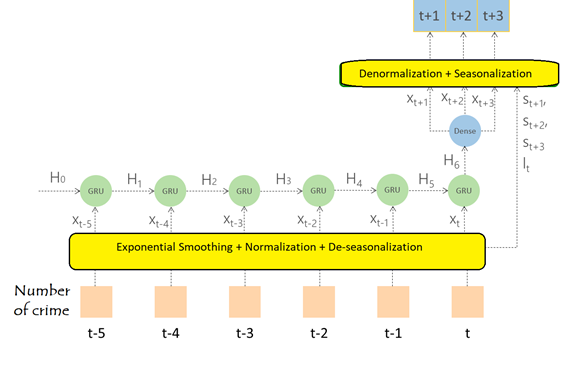

In [3]:
Image('./images/Untitled.png')

In [26]:
from keras.models import Model
from keras.layers import Input, GRU, Dense, Lambda,LSTM,Dropout,Bidirectional,TimeDistributed,RepeatVector,Activation,concatenate,merge
from keras.callbacks import EarlyStopping
from keras.models import Sequential

Using TensorFlow backend.


### Create custom layers in Keras
In this section we define two custom layers:
- ***ES*** layer: This layer implements the Expomemtial Smoothing,  normalization and de-seasonalization for input data.
- ***Denormalization*** layer: This layer takes the normalization and de-seasonalization coefficients from ES layer and multiply them to output of RNN for de-normalization and seasonalization.


There are 3 methods you need to implement in your custom layer:
- build(input_shape): this is where you will define your weights.
- call(x): this is where the layer's logic lives.
- compute_output_shape(input_shape): in case your layer modifies the shape of its input, you should specify here the shape transformation logic. 

You can check [Keras documentation](https://keras.io/layers/writing-your-own-keras-layers/) for more details about creating custom layer.

In [27]:
from keras import backend as K
from keras.layers import Layer
from keras import initializers

# Exponential Smoothing + Normalization
class ES(Layer):

    def __init__(self, horizon, m, batch_size, time_steps, **kwargs):
        self.horizon = horizon
        self.m = m
        self.batch_size = batch_size
        self.time_steps = time_steps
        
        super(ES, self).__init__(**kwargs)

    # initialization of the learned parameters of exponential smoothing
    def build(self, input_shape):
        self.alpha = self.add_weight(name='alpha', shape=(1,),
                                     initializer='uniform', trainable=True)
        print(self.alpha )
        self.gamma = self.add_weight(name='gamma', shape=(1,),
                                     initializer='uniform', trainable=True)
        self.init_seasonality = self.add_weight(name='init_seasonality', shape=(self.m,),
                                                initializer=initializers.Constant(value=0.8), trainable=True)
        print(self.init_seasonality)
        self.init_seasonality_list = [K.slice(self.init_seasonality,(i,),(1,)) for i in range(self.m)]
        self.seasonality_queue = deque(self.init_seasonality_list, self.m)
        #print(self.seasonality_queue)
        self.level = self.add_weight(name='init_level', shape=(1,),
                                     initializer=initializers.Constant(value=0.8), 
                                     trainable=True)
        super(ES, self).build(input_shape)  

    def call(self, x):

        # extract time-series from feature vector
        n_examples = K.int_shape(x)[0]
        if n_examples is None:
            n_examples = self.batch_size
        x1 = K.slice(x,(0,0,0),(1,self.time_steps,1))
        x1 = K.reshape(x1,(self.time_steps,))
        #print(x1)
        x2 = K.slice(x,(1,self.time_steps-1,0),(n_examples-1,1,1))
        x2 = K.reshape(x2,(n_examples-1,))
        #print(x2)
        ts = K.concatenate([x1,x2])
        #print(ts)
        
        x_norm = []  # normalized values of time-series
        ls = []      # coeffients for denormalization of forecasts
        
        l_t_minus_1 = self.level
        print(n_examples+self.time_steps-1)
        for i in range(n_examples+self.time_steps-1):
        
            # compute l_t
            y_t = ts[i]
            s_t = self.seasonality_queue.popleft()
            l_t = self.alpha * y_t / s_t + (1 - self.alpha) * l_t_minus_1
            
            # compute s_{t+m}
            s_t_plus_m = self.gamma * y_t / l_t + (1 - self.gamma) * s_t
            
            self.seasonality_queue.append(s_t_plus_m)
          
            # normalize y_t
            x_norm.append(y_t / (s_t * l_t))

            l_t_minus_1 = l_t

            if i >= self.time_steps-1:
                l = [l_t]*self.horizon
                l = K.concatenate(l)
                s = [self.seasonality_queue[i] for i in range(self.horizon)] # we assume here that horizon < m
                s = K.concatenate(s)
                ls_t = K.concatenate([K.expand_dims(l), K.expand_dims(s)])
                ls.append(K.expand_dims(ls_t,axis=0))  
       
        self.level = l_t
        x_norm = K.concatenate(x_norm)

        # create x_out
        x_out = []
        for i in range(n_examples):
            norm_features = K.slice(x_norm,(i,),(self.time_steps,))
            norm_features = K.expand_dims(norm_features,axis=0)
            x_out.append(norm_features)

        x_out = K.concatenate(x_out, axis=0)
        x_out = K.expand_dims(x_out)

        # create tensor of denormalization coefficients 
        denorm_coeff = K.concatenate(ls, axis=0)
        return [x_out, denorm_coeff]

    def compute_output_shape(self, input_shape):
        return [(input_shape[0], input_shape[1], input_shape[2]), (input_shape[0], self.horizon, 2)]
    
class Denormalization(Layer):
    
    def __init__(self, **kwargs):
        super(Denormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        super(Denormalization, self).build(input_shape)  

    def call(self, x):
        #print(x[0] * x[1][:,:,0] * x[1][:,:,1])
        return x[0] *(( x[1][:,:,0] + x[1][:,:,1])+( x[1][:,:,0] + x[1][:,:,1])
                     +( x[2][:,:,0] + x[2][:,:,1])+( x[2][:,:,0] + x[2][:,:,1])
                     +( x[3][:,:,0] + x[3][:,:,1])+( x[3][:,:,0] + x[3][:,:,1])
                     +( x[4][:,:,0] + x[4][:,:,1])+( x[4][:,:,0] + x[4][:,:,1])
                     +( x[5][:,:,0] + x[5][:,:,1])+( x[5][:,:,0] + x[5][:,:,1]))

    def compute_output_shape(self, input_shape):
        return input_shape[0]
class summ(Layer):
    
    def __init__(self, **kwargs):
        super(summ, self).__init__(**kwargs)

    def build(self, input_shape):
        super(summ, self).build(input_shape)  

    def call(self, x):
        #print(x[0] * x[1][:,:,0] * x[1][:,:,1])
        return (x[0]+ x[1]+ x[2]+ x[3]+ x[4])

    def compute_output_shape(self, input_shape):
        return input_shape[0]

In [28]:
HORIZON

1

### Create ES-RNN model
Since Denormalization layer has inputs from two previous layers, we need to use functional API of Keras to create the model.

In [29]:
model_input = Input(shape=(None, 1))
model_input2 = Input(shape=(None, 1))
model_input3 = Input(shape=(None, 1))
model_input4 = Input(shape=(None, 1))
model_input5 = Input(shape=(None, 1))
model_input6 = Input(shape=(None, 1))
[normalized_input, denormalization_coeff] = ES(HORIZON, m, BATCH_SIZE, T)(model_input)
gru_out1 =Bidirectional( LSTM(LATENT_DIM, return_sequences=True))(normalized_input)

gru_out1= Dense(HORIZON)(gru_out1)
#_________________________________________________________________________________
[normalized_input2, denormalization_coeff2] = ES(HORIZON, m, BATCH_SIZE, T)(model_input2)
gru_out2 =Bidirectional( LSTM(LATENT_DIM, return_sequences=True))(normalized_input2)
gru_out2= Dense(HORIZON)(gru_out2)
#_________________________________________________________________________________
[normalized_input3, denormalization_coeff3] = ES(HORIZON, m, BATCH_SIZE, T)(model_input3)
gru_out3 =Bidirectional( LSTM(LATENT_DIM, return_sequences=True))(normalized_input3)
gru_out3= Dense(HORIZON)(gru_out3)

#_________________________________________________________________________________
[normalized_input4, denormalization_coeff4] = ES(HORIZON, m, BATCH_SIZE, T)(model_input4)
gru_out4 =Bidirectional( LSTM(LATENT_DIM, return_sequences=True))(normalized_input4)
gru_out4= Dense(HORIZON)(gru_out4)

#_________________________________________________________________________________
[normalized_input5, denormalization_coeff5] = ES(HORIZON, m, BATCH_SIZE, T)(model_input5)
gru_out5 =Bidirectional( LSTM(LATENT_DIM, return_sequences=True))(normalized_input5)
gru_out5= Dense(HORIZON)(gru_out5)

#_________________________________________________________________________________
#gru_out =Bidirectional( LSTM(LATENT_DIM))(normalized_input)
gru_out=concatenate([gru_out1,gru_out2,gru_out3,gru_out4,gru_out5])
gru_out =Bidirectional( LSTM(5))(gru_out)
model_output_normalized = Dense(HORIZON)(gru_out)
model_output_normalized=Activation('linear')(model_output_normalized)
model_output = Denormalization()([model_output_normalized, denormalization_coeff, denormalization_coeff2, denormalization_coeff3, denormalization_coeff4, denormalization_coeff5])


model = Model(inputs=[model_input,model_input2,model_input3,model_input4,model_input5], outputs=model_output)

# our model will accept the inputs of the two branches and
# then output a single value




<tf.Variable 'es_1/alpha:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'es_1/init_seasonality:0' shape=(24,) dtype=float32_ref>
65
<tf.Variable 'es_2/alpha:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'es_2/init_seasonality:0' shape=(24,) dtype=float32_ref>
65
<tf.Variable 'es_3/alpha:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'es_3/init_seasonality:0' shape=(24,) dtype=float32_ref>
65
<tf.Variable 'es_4/alpha:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'es_4/init_seasonality:0' shape=(24,) dtype=float32_ref>
65
<tf.Variable 'es_5/alpha:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'es_5/init_seasonality:0' shape=(24,) dtype=float32_ref>
65


In [30]:
model.compile(optimizer='RMSprop', loss='mse')

In [31]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_5 (I

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='./images/model_plot.png', show_shapes=True, show_layer_names=True)

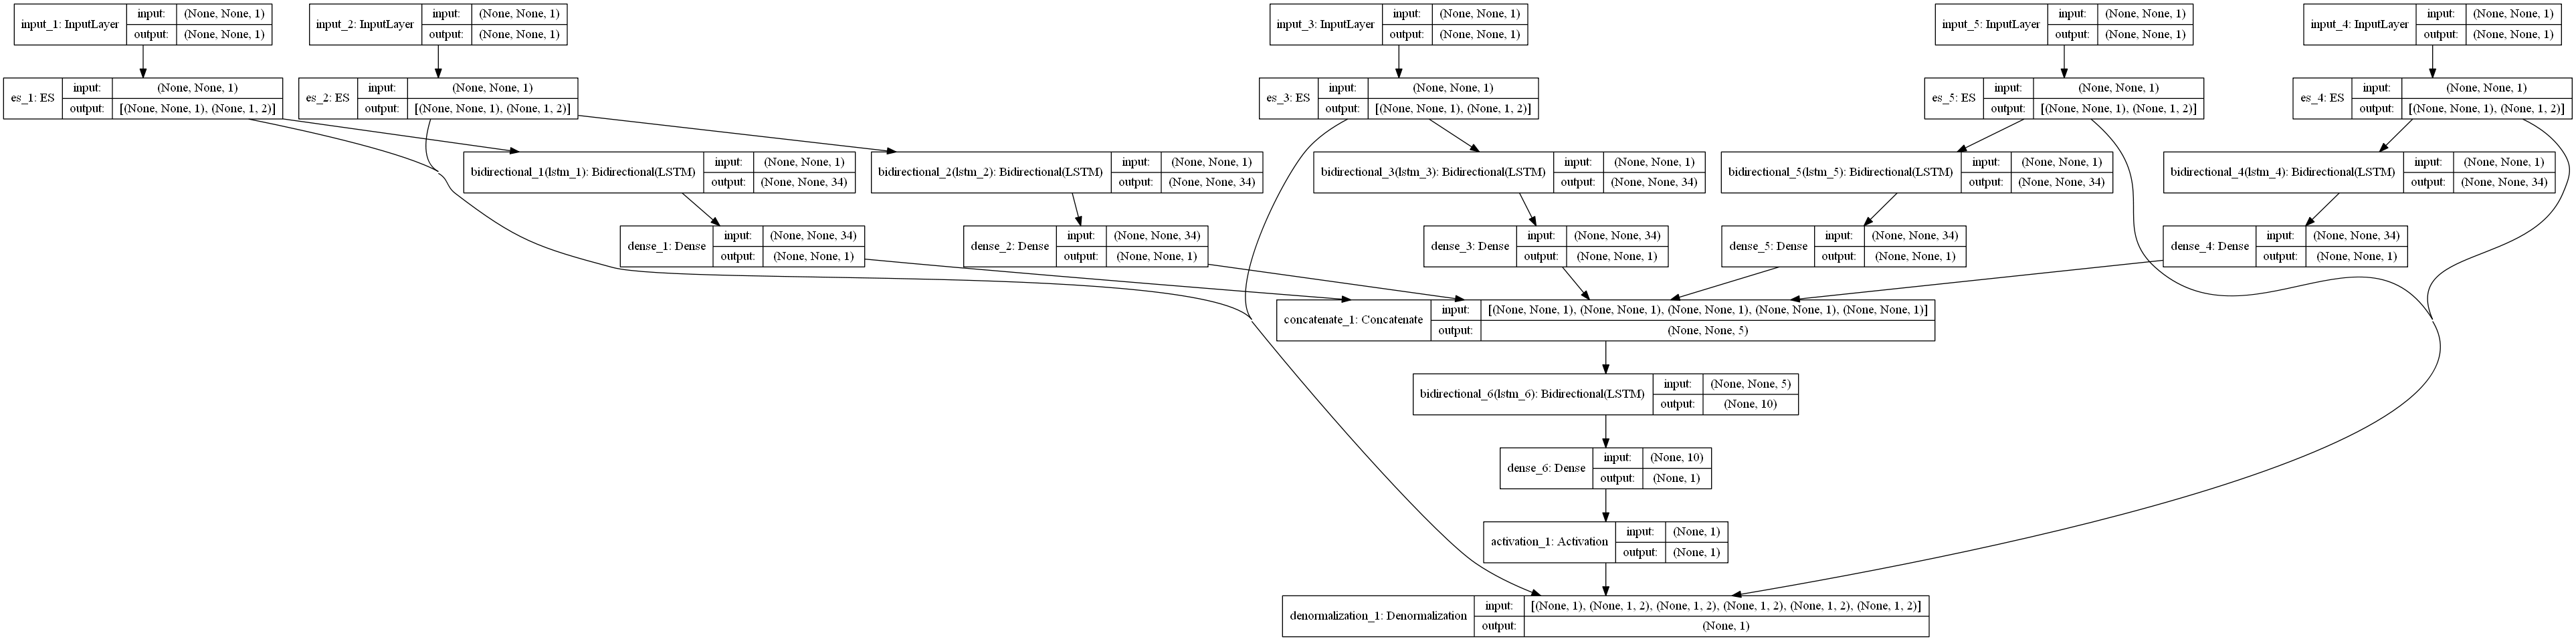

In [33]:
Image('./images/model_plot.png')

In [34]:
train_inputs['target']

feature,y
time step,t+1
2010-01-01 17:00:00,0.14
2010-01-01 18:00:00,0.11
2010-01-01 19:00:00,0.13
2010-01-01 20:00:00,0.08
2010-01-01 21:00:00,0.12
...,...
2013-12-31 12:00:00,0.09
2013-12-31 13:00:00,0.14
2013-12-31 14:00:00,0.13


In [35]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

In [36]:
start1=time.clock()
model.fit([train_inputs2['X'],train_inputs3['X'],train_inputs4['X'],train_inputs5['X'],train_inputs6['X']],
         train_inputs['target'],
          batch_size=BATCH_SIZE,
          shuffle=False,
          epochs=EPOCHS,
          validation_split=0.2,
          callbacks=[earlystop],
          verbose=1)
stop1=time.clock()
print("finsh")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 28032 samples, validate on 7008 samples
Epoch 1/10





28032/28032 [==============================] - 64s 2ms/step - loss: 0.0055 - val_loss: 7.5678e-04
Epoch 2/10
28032/28032 [==============================] - 42s 2ms/step - loss: 0.0011 - val_loss: 9.0429e-04
Epoch 3/10
28032/28032 [==============================] - 49s 2ms/step - loss: 9.8970e-04 - val_loss: 7.1848e-04
Epoch 4/10
28032/28032 [==============================] - 49s 2ms/step - loss: 9.3459e-04 - val_loss: 6.8863e-04
Epoch 5/10
28032/28032 [==============================] - 46s 2ms/step - loss: 8.9969e-04 - val_loss: 6.6363e-04
Epoch 6/10
28032/28032 [==============================] - 41s 1ms/step - loss: 8.7585e-04 - val_loss: 6.5251e-04
Epoch 7/10
28032/28032 [==============================] - 40s 1ms/step - loss: 8.5725e-04 - val_loss: 6.4485e-04
Epoch 8/10
28032/28032 [==============================] - 40s 1ms/

In [37]:
stop1 - start1

474.1296787

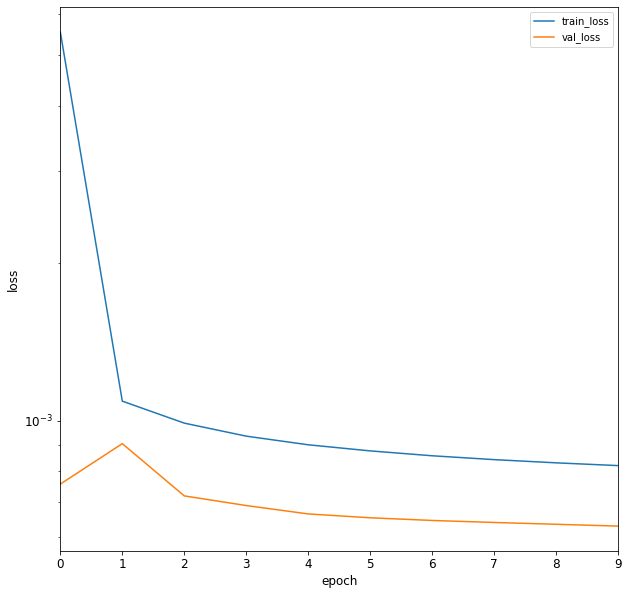

In [38]:
plot_df = pd.DataFrame.from_dict({'train_loss':model.history.history['loss'], 'val_loss':model.history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

## Evaluate the model

In [39]:

test0 = energy0.copy()[test_start_dt:][['load', 'crime1','crime2','crime3','crime4','crime5']]
test0[['load', 'crime1','crime2','crime3','crime4','crime5']] = X_scaler.transform(test0)

In [40]:
test0

,load,crime1,crime2,crime3,crime4,crime5
2014-01-01 11:00:00,0.07,0.14,0.31,0.06,0.02,0.06
2014-01-01 12:00:00,0.29,0.32,0.38,0.16,0.15,0.56
2014-01-01 13:00:00,0.11,0.14,0.38,0.06,0.04,0.12
2014-01-01 14:00:00,0.10,0.24,0.55,0.04,0.01,0.02
2014-01-01 15:00:00,0.15,0.32,0.28,0.14,0.05,0.15
...,...,...,...,...,...,...
2014-12-30 14:00:00,0.15,0.49,0.21,0.02,0.04,0.25
2014-12-30 15:00:00,0.13,0.41,0.45,0.06,0.02,0.08
2014-12-30 16:00:00,0.14,0.24,0.28,0.08,0.05,0.25
2014-12-30 17:00:00,0.12,0.43,0.31,0.06,0.02,0.10


In [41]:
look_back_dt = dt.datetime.strptime(test_start_dt, '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours=T-1)
test = test0.copy()[test_start_dt:test_end_dt][['load']]

test_inputs = TimeSeriesTensor(test, 'load', HORIZON,BATCH_SIZE, tensor_structure)

test2 = test0.copy()[test_start_dt:test_end_dt][['load']]

test_inputs2 = TimeSeriesTensor(test2, 'load', HORIZON,BATCH_SIZE, tensor_structure)

test3 = test0.copy()[test_start_dt:test_end_dt][['load']]

test_inputs3 = TimeSeriesTensor(test3, 'load', HORIZON,BATCH_SIZE, tensor_structure)

test4 = test0.copy()[test_start_dt:test_end_dt][['load']]

test_inputs4 = TimeSeriesTensor(test4, 'load', HORIZON,BATCH_SIZE, tensor_structure)

test5 = test0.copy()[test_start_dt:test_end_dt][['load']]

test_inputs5 = TimeSeriesTensor(test5, 'load', HORIZON,BATCH_SIZE, tensor_structure)

test6 = test0.copy()[test_start_dt:test_end_dt][['load']]

test_inputs6 = TimeSeriesTensor(test6, 'load', HORIZON,BATCH_SIZE, tensor_structure)

In [42]:
predictions = model.predict([test_inputs2['X'],test_inputs3['X'],test_inputs4['X'],test_inputs5['X'],test_inputs6['X']], batch_size=BATCH_SIZE)


In [43]:
predictions

array([[0.09],
       [0.09],
       [0.08],
       ...,
       [0.08],
       [0.06],
       [0.05]], dtype=float32)

In [44]:
eval_df = create_evaluation_df(predictions, test_inputs, HORIZON, y_scaler,BATCH_SIZE)
eval_T1=eval_df[eval_df['h']=='t+1']
eval_T2=eval_df[eval_df['h']=='t+2']
eval_T3=eval_df[eval_df['h']=='t+3']

Compute MAPE for each forecast horizon

In [45]:
from sklearn.metrics import mean_squared_error

Compute MAPE across all predictions

In [46]:
mapa1=mean_absolute_percentage_error(eval_T1['prediction'], eval_T1['actual'])
print(mapa1)

0.3155770252951642


Compute RMSE across all predictions

In [47]:
mean_squared_error(eval_T1['prediction'], eval_T1['actual'], squared=False)

11.97908631309905

Compute MAE across all prediction

In [48]:
mean_absolute_error(eval_T1['prediction'], eval_T1['actual'])

9.513087298123347

_____________________________________________________________________________________________________________
*************************************************************************************************************
Compute MAPE across all predictions

In [49]:
mape(eval_df['prediction'], eval_df['actual'])

0.46455738825939286

In [50]:
np.sqrt((eval_df['prediction'] - eval_df['actual']) ** 2).mean()

9.513087298123347

In [51]:
((eval_df['prediction'] - eval_df['actual']).abs()).mean()

9.513087298123347

In [52]:
eval_df['APE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
(eval_df.groupby('h')['APE'].mean())

h
t+1   0.46
Name: APE, dtype: float64

Plot actuals vs predictions at each horizon for first week of the test period. As is to be expected, predictions for one step ahead (*t+1*) are more accurate than those for 2 or 3 steps ahead

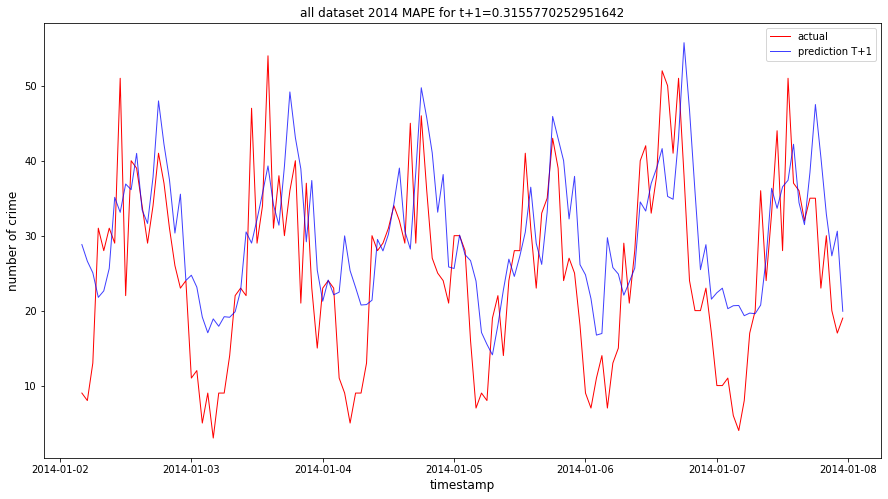

In [53]:
plot_df = eval_df[(eval_df.timestamp<year2+'-1-08') & (eval_df.h=='t+1')][['timestamp', 'actual']]
for t in range(1, HORIZON+1):
    plot_df['t+'+str(t)] = eval_df[(eval_df.timestamp<year2+'-1-08') & (eval_df.h=='t+'+str(t))]['prediction'].values

fig = plt.figure(figsize=(15, 8))
ax = plt.plot(plot_df['timestamp'], plot_df['actual'], color='red', linewidth=1.0,label='actual')
ax = fig.add_subplot(111)
ax.plot(plot_df['timestamp'], plot_df['t+1'], color='blue', linewidth=1.0, alpha=0.75,label='prediction T+1')
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('number of crime', fontsize=12)
try:
    arr=energy['BORO_NM'].unique()[0]
except KeyError:
    
    arr="all dataset"

       
plt.title(arr+" "+year2+" MAPE for t+1="+str(mapa1))
ax.legend(loc='best')
plt.show()

In [54]:
print(plot_df['actual'].sum())
print(int(plot_df['t+1'].sum()))


274973.0
232906


In [57]:
#energy['BORO_NM'].unique()[0]

In [55]:
path1="C:/Users/ghazwan/Pictures/last test/"+str(year2)+"/hourly/w/"

In [56]:
model.save_weights(path1+str(T)+"es_bi_lstm_all2_"+year2+".h5")
model.save(path1+"es_bi_lstm_all2_"+year2)
eval_T1.to_csv (path1+"es_bi_lstm_all2_"+year2+'XL.csv')

In [63]:
plt.savefig(path1+'books_read.png')

<Figure size 432x288 with 0 Axes>

In [55]:
year2

'2016'